In [1]:
from utils import config, sample_utils as su
from collections import defaultdict
import math, bz2

data_dir = config.data_directory
# ========================================
# Make a table with the following fields:
# ========================================
# Sample ID
# Alpha diversity
# Richness (number of species)
# Original number of reads
# Number of reads (after processing)
# Total average coverage of marker genes
# Total median coverage of marker genes
# ========================================

# Relative abundance file (for alpha diversity, richness)
relab_fpath = "%s/species/relative_abundance.txt.bz2" % data_dir
relab_file = bz2.BZ2File(relab_fpath, 'r')
data = [row.strip().split('\t') for row in relab_file]
header = data[0]

alpha_div_dict = {}
richness_dict = {}

for i in range(1, len(header)):
	acc = 0
	richness_acc = 0
	
	for row in data[1:]:
		rel_ab = float(row[i])
		if rel_ab != 0:
			acc += (rel_ab * math.log(rel_ab))
			richness_acc += 1
	
	alpha_div_dict[header[i]] = (acc*-1)
	richness_dict[header[i]] = richness_acc

# Original read counts file (for number of reads in FASTQ files)
orig_read_count_dict = su.parse_sample_read_count_map()

# Read counts file (for number of reads mapped to some species)
readc_fpath = "%s/species/count_reads.txt.bz2" % data_dir
readc_file = bz2.BZ2File(readc_fpath, 'r')
data = [row.strip().split('\t') for row in readc_file]
header = data[0]

read_count_dict = defaultdict(int)

for row in data[1:]: # Loops over species
	for i in range(1, len(header)):
		read_count = int(row[i])
		read_count_dict[header[i]] += read_count

# Coverage file: average read-depth of 15 marker genes per species
# (total bp of mapped reads/total bp of 15 marker-genes)
cov_file = bz2.BZ2File("%s/species/coverage.txt.bz2" % data_dir, 'r')
samples = cov_file.readline().strip().split()[1:] # header

total_avg_marker_cov_dict = defaultdict(float)

for line in cov_file:
	covs = line.strip().split()[1:]
	for i in range(len(samples)):
		total_avg_marker_cov_dict[samples[i]] += float(covs[i])

# Finally, get median coverage of marker gene summed over species
total_med_marker_cov_dict = defaultdict(float)

# Get list of species that MIDAS analyzed genes for...
# (There are 194)
with open("%s/genes/species_genes.txt" % data_dir, 'r') as file:
	species_names = [line.strip() for line in file]

# Genes summary file: contains median read-depth across 15 marker genes
# Note that median marker coverage is used to estimate copy number
for species in species_names:
	gsumm_fpath = "%s/genes/%s/genes_summary.txt" % (data_dir, species)
	gsumm_file = open(gsumm_fpath, 'r')
	gsumm_file.readline() # remove header
	for line in gsumm_file:
		sample, _, _, _, _, med_cov = line.strip().split()
		total_med_marker_cov_dict[sample] += float(med_cov)

In [8]:
# Now get rarefied data (version 5/16/21)

data_rarefied_dir = config.data_rarefied_directory

# Original read counts file (for number of reads in FASTQ files)
orig_read_count_dict = su.parse_sample_read_count_map()
good_samples = [] # list of samples with 20,000,000+ reads

for sample in orig_read_count_dict:
    if orig_read_count_dict[sample] > 20000000:
        good_samples.append(sample)

# Relative abundance file (for alpha diversity, richness)
relab_fpath = "%s/species/relative_abundance.txt" % data_rarefied_dir
relab_file = open(relab_fpath, 'r')
data = [row.strip().split('\t') for row in relab_file]
header = data[0]

alpha_div_dict_rarefied = {}
richness_dict_rarefied = {}

for i in range(1, len(header)):
	acc = 0
	richness_acc = 0
	
	for row in data[1:]:
		rel_ab = float(row[i])
		if rel_ab != 0:
			acc += (rel_ab * math.log(rel_ab))
			richness_acc += 1
	
	if header[i] in good_samples:
		alpha_div_dict_rarefied[header[i]] = (acc*-1)
		richness_dict_rarefied[header[i]] = richness_acc

# Read counts file (for number of reads mapped to some species)
readc_fpath = "%s/species/count_reads.txt" % data_rarefied_dir
readc_file = open(readc_fpath, 'r')
data = [row.strip().split('\t') for row in readc_file]
header = data[0]

read_count_dict_rarefied = defaultdict(int)

for row in data[1:]: # Loops over species
	for i in range(1, len(header)):
		if header[i] in good_samples:
			read_count = int(row[i])
			read_count_dict_rarefied[header[i]] += read_count

# Coverage file: average read-depth of 15 marker genes per species
# (total bp of mapped reads/total bp of 15 marker-genes)
cov_file = open("%s/species/coverage.txt" % data_rarefied_dir, 'r')
samples = cov_file.readline().strip().split()[1:] # header

total_avg_marker_cov_dict_rarefied = defaultdict(float)

for line in cov_file:
	covs = line.strip().split()[1:]
	for i in range(len(samples)):
		if samples[i] in good_samples:
			total_avg_marker_cov_dict_rarefied[samples[i]] += float(covs[i])

In [1]:
# Alternate for rarefied data

from utils import config, sample_utils as su
from collections import defaultdict
import math, bz2

data_dir = '/u/home/d/daisyche/dbd/data_rarefied/'

# Relative abundance file (for alpha diversity, richness)
relab_fpath = "%s/species/relative_abundance.txt" % data_dir
relab_file = open(relab_fpath, 'r')
data = [row.strip().split('\t') for row in relab_file]
header = data[0]

alpha_div_dict = {}
richness_dict = {}

for i in range(1, len(header)):
	acc = 0
	richness_acc = 0
	
	for row in data[1:]:
		rel_ab = float(row[i])
		if rel_ab != 0:
			acc += (rel_ab * math.log(rel_ab))
			richness_acc += 1
	
	alpha_div_dict[header[i]] = (acc*-1)
	richness_dict[header[i]] = richness_acc

# Read counts file (for number of reads mapped to some species)
readc_fpath = "%s/species/count_reads.txt" % data_dir
readc_file = open(readc_fpath, 'r')
data = [row.strip().split('\t') for row in readc_file]
header = data[0]

read_count_dict = defaultdict(int)

for row in data[1:]: # Loops over species
	for i in range(1, len(header)):
		read_count = int(row[i])
		read_count_dict[header[i]] += read_count

# Coverage file: average read-depth of 15 marker genes per species
# (total bp of mapped reads/total bp of 15 marker-genes)
cov_file = open("%s/species/coverage.txt" % data_dir, 'r')
samples = cov_file.readline().strip().split()[1:] # header

total_avg_marker_cov_dict = defaultdict(float)

for line in cov_file:
	covs = line.strip().split()[1:]
	for i in range(len(samples)):
		total_avg_marker_cov_dict[samples[i]] += float(covs[i])

In [5]:
from matplotlib import pyplot as plt
import numpy as np

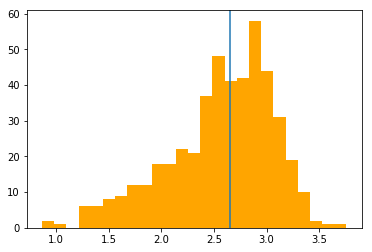

In [12]:
# Distribution of alpha diversity values
# Average around 2.65
# Left skewed: there are some samples with unusually low alpha diversity
x = alpha_div_dict.values()
plt.hist(x, bins=25, color='orange')
plt.axvline(np.median(x))
plt.show()

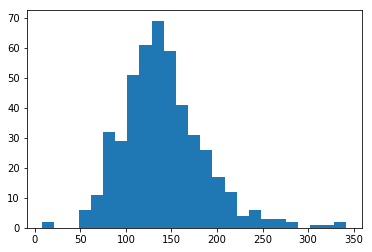

In [16]:
# Distribution of species richness values
x = richness_dict.values()
plt.hist(x, bins=25)
plt.show()

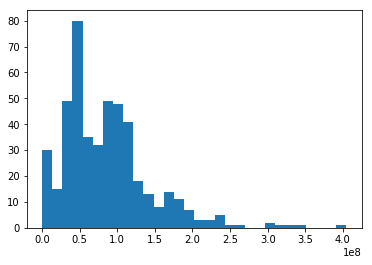

In [18]:
# Distribution of original total read count values
x = orig_read_count_dict.values()
plt.hist(x, bins=30)
plt.show()

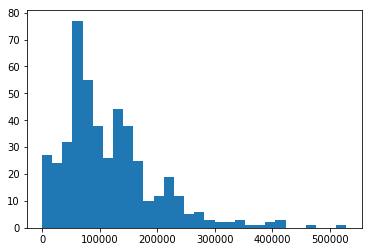

In [20]:
# Distribution of total read count values
# Fit Poisson?
x = read_count_dict.values()
plt.hist(x, bins=30)
plt.show()

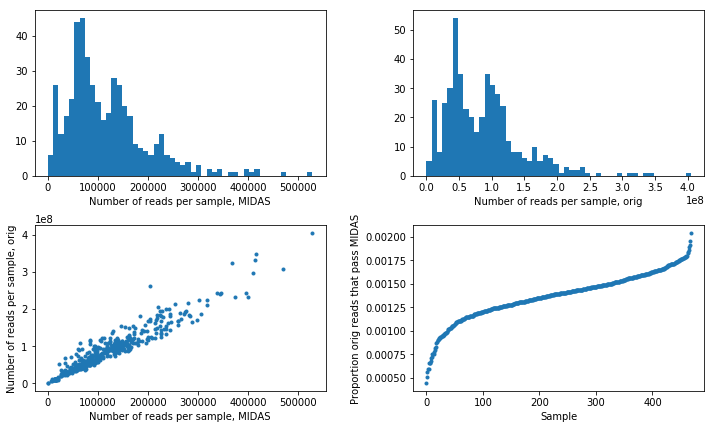

In [40]:
# I'm curious, what proportion of reads make it for MIDAS?
rc_values = []
orc_values = []
rc_props = []

for sample in read_count_dict:
    rc = read_count_dict[sample]
    orc = orig_read_count_dict[sample]
    rc_values.append(rc)
    orc_values.append(orc)
    rc_props.append(rc/float(orc))

fig, ax = plt.subplots(2, 2, figsize=(12,7))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax[0][0].hist(rc_values, bins=50)
ax[0][0].set_xlabel("Number of reads per sample, MIDAS")

ax[0][1].hist(orc_values, bins=50)
ax[0][1].set_xlabel("Number of reads per sample, orig")

ax[1][0].plot(rc_values, orc_values, '.')
ax[1][0].set_xlabel("Number of reads per sample, MIDAS")
ax[1][0].set_ylabel("Number of reads per sample, orig")

ax[1][1].plot(sorted(rc_props), '.')
ax[1][1].set_xlabel("Sample")
ax[1][1].set_ylabel("Proportion orig reads that pass MIDAS")

plt.show()

In [43]:
sorted(orig_read_count_dict.items(), key=lambda x: x[1])

[('700038918', 70628),
 ('700165665', 82380),
 ('700105000', 6498170),
 ('700113954', 6627696),
 ('700106946', 7975718),
 ('700101134', 8327736),
 ('700102848', 8972814),
 ('700122000', 9181436),
 ('700110222', 9491950),
 ('700108896', 9529204),
 ('700119307', 9536878),
 ('700108341', 9681088),
 ('700172069', 10112060),
 ('700121639', 10131382),
 ('700034081', 10201720),
 ('700033363', 10203626),
 ('700095831', 10294240),
 ('700032413', 10374182),
 ('700109506', 10434040),
 ('700166025', 10726498),
 ('700107489', 10815954),
 ('700111986', 10835698),
 ('700109921', 11000718),
 ('700016210', 11004040),
 ('700111745', 11566882),
 ('700034622', 11569026),
 ('700095524', 11635766),
 ('700034838', 11773620),
 ('700032068', 12833946),
 ('700033201', 12903434),
 ('700173686', 15120806),
 ('700171390', 17997920),
 ('700023188', 20070826),
 ('700098429', 20745022),
 ('700111026', 22166702),
 ('700013597', 23180078),
 ('700097631', 23559470),
 ('700124561', 23687882),
 ('700013693', 23841900),
 (

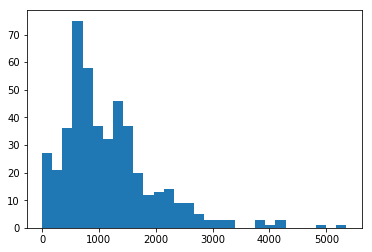

In [22]:
# Distribution of total average marker gene coverage values
x = total_avg_marker_cov_dict.values()
plt.hist(x, bins=30)
plt.show()

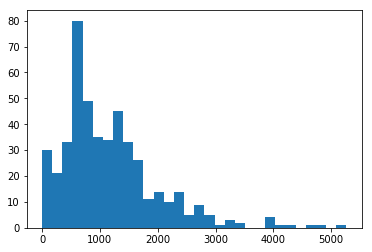

In [22]:
# Distribution of total median marker gene coverage values
# Very similar in shape to average
x = total_med_marker_cov_dict.values()
plt.hist(x, bins=30)
plt.show()

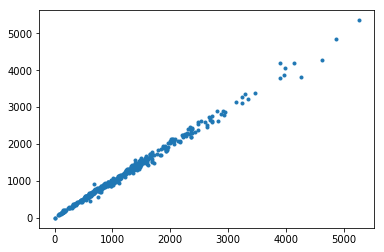

In [23]:
# Do average and median differ all that much?
# Phew, not really

meds = []
avgs = []
for sample in total_med_marker_cov_dict:
    meds.append(total_med_marker_cov_dict[sample])
    avgs.append(total_avg_marker_cov_dict[sample])
plt.plot(meds, avgs, '.')
plt.show()

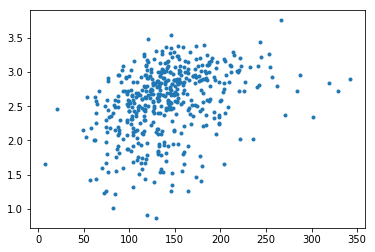

In [25]:
# Alpha diversity vs. species richness
richness_vals = []
alpha_div_vals = []
for sample in richness_dict:
    richness_vals.append(richness_dict[sample])
    alpha_div_vals.append(alpha_div_dict[sample])
plt.plot(richness_vals, alpha_div_vals, '.')
plt.show()

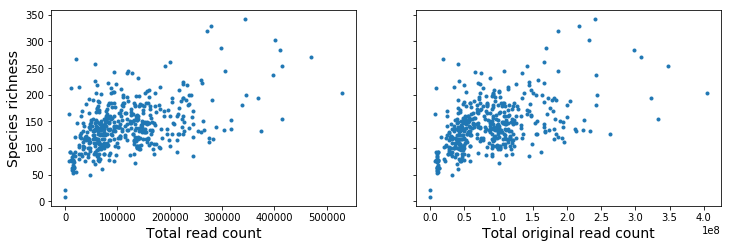

In [27]:
# Species richness vs read count
# Positive relationship could either be
# biological (does higher read count tend to mean more abundant microbes,
# and might that relate to species diversity [e.g. all niches filled]?)
# or technical (e.g. more reads, more low abundance species detected)

richness_vals = []
read_count_vals = []
orig_read_count_vals = []

for sample in richness_dict:
    richness_vals.append(richness_dict[sample])
    read_count_vals.append(read_count_dict[sample])
    orig_read_count_vals.append(orig_read_count_dict[sample])

fig, ax = plt.subplots(1, 2, figsize=(12,3.6), sharey=True)
ax[0].plot(read_count_vals, richness_vals, '.')
ax[0].set_xlabel("Total read count", fontsize=14)
ax[0].set_ylabel("Species richness", fontsize=14)
ax[1].plot(orig_read_count_vals, richness_vals, '.')
ax[1].set_xlabel("Total original read count", fontsize=14)
fig.savefig('%s/richness_vs_read_count.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

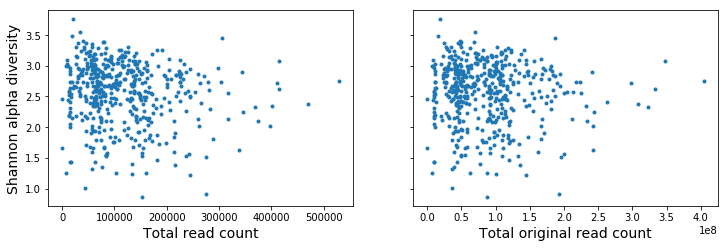

In [29]:
# Similarly, alpha diversity vs read count
# Ooh, the effect of low abundance species is reduced

alpha_div_vals = []
read_count_vals = []
orig_read_count_vals = []

for sample in alpha_div_dict:
    alpha_div_vals.append(alpha_div_dict[sample])
    read_count_vals.append(read_count_dict[sample])
    orig_read_count_vals.append(orig_read_count_dict[sample])

fig, ax = plt.subplots(1, 2, figsize=(12,3.6), sharey=True)
ax[0].plot(read_count_vals, alpha_div_vals, '.')
ax[0].set_xlabel("Total read count", fontsize=14)
ax[0].set_ylabel("Shannon alpha diversity", fontsize=14)
ax[1].plot(orig_read_count_vals, alpha_div_vals, '.')
ax[1].set_xlabel("Total original read count", fontsize=14)
# ax.hist(alpha_div_vals, bins=30, orientation='horizontal')
fig.savefig('%s/alpha_div_vs_read_count.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

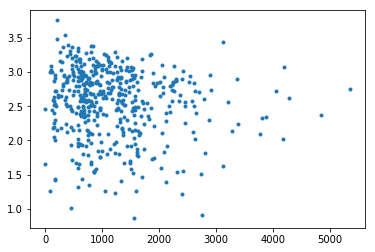

In [31]:
# Alpha diversity vs total marker gene coverage

alpha_div_vals = []
marker_cov_vals = []
for sample in alpha_div_dict:
    alpha_div_vals.append(alpha_div_dict[sample])
    marker_cov_vals.append(total_avg_marker_cov_dict[sample])
plt.plot(marker_cov_vals, alpha_div_vals, '.')
plt.show()

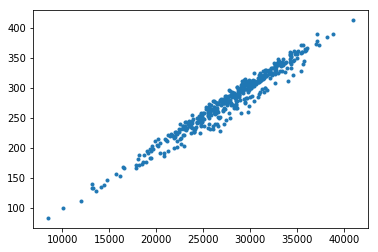

In [32]:
# Oh wait, how about read count vs. coverage?

marker_cov_vals = []
read_count_vals = []
for sample in read_count_dict_rarefied:
    marker_cov_vals.append(total_avg_marker_cov_dict_rarefied[sample])
    read_count_vals.append(read_count_dict_rarefied[sample])
plt.plot(read_count_vals, marker_cov_vals, '.')
plt.show()